# Heart Attack Prediction using machine learning

# Loading and visualizing the Dataset

You can access the dataset from kaggle [here](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset).

## Importing Libraries

In [185]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

sns.set_style('darkgrid')

In [186]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Define the path to your dataset directory
df = pd.read_csv('/content/drive/MyDrive/DMDW Group 31/Heart Attack.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [188]:
df.shape

(1319, 9)

In [189]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [190]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


### Overview of the Dataset
- We have 1319 rows and 9 columns
- There are no null values in the dataset
- We will need to one hot encode the `gender` variable
- We will need to convert values in the `class` column to 0 and 1
- We will also need to deal with some obvious outliers probably caused by human error

## Now it's time for some plotting

### 1. Age

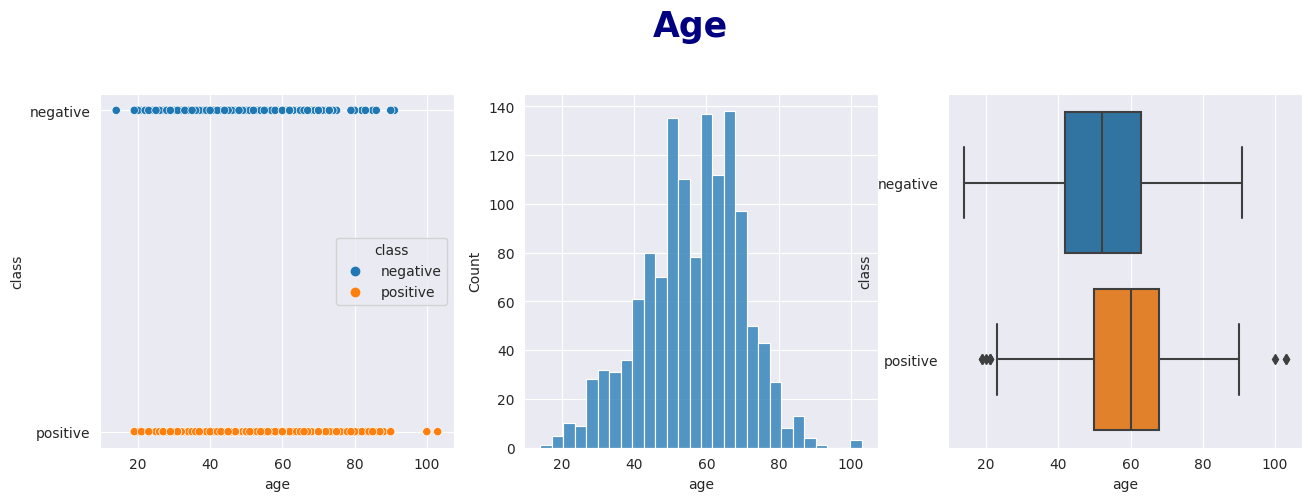

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Age', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)
# ax1
sns.scatterplot(data=df, x='age', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='age', ax=axes[1])

# ax3
sns.boxplot(data=df, x='age', y='class', ax=axes[2])

plt.show()

### 2. Gender

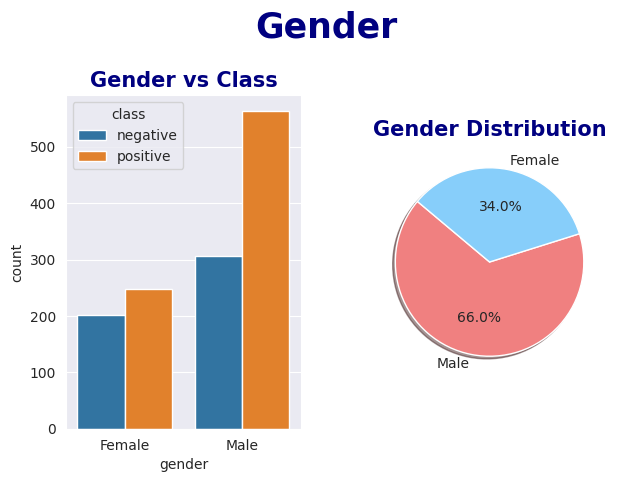

In [193]:
# Create subplots
fig, axes = plt.subplots(1, 2)
plt.suptitle('Gender', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1: Countplot
sns.countplot(data=df, x='gender', ax=axes[0], hue='class')
axes[0].set_title('Gender vs Class', fontsize=15,
                  fontweight='bold', color='navy')
axes[0].set_xticklabels(['Female', 'Male'], )

# ax2: Pie Chart
gender_counts = df['gender'].value_counts()
labels = ['Male', 'Female']
sizes = gender_counts.values
colors = ['lightcoral', 'lightskyblue']  # Colors for the pie slices

axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
axes[1].set_title('Gender Distribution', fontsize=15,
                  fontweight='bold', color='navy')

plt.show()

### 3. Impulse

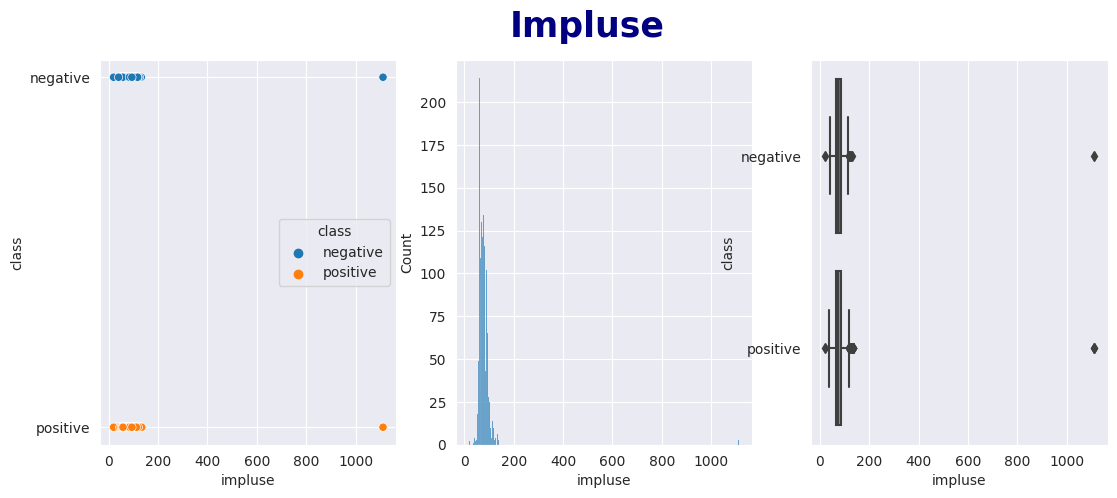

In [194]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Impluse', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=df, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=df, x='impluse', y='class', ax=axes[2])

plt.show()

Some values are obvious outliers, let's clean to have a clearer visualization of the data


***Dealing with the faulty data***

### 4. Pressure High

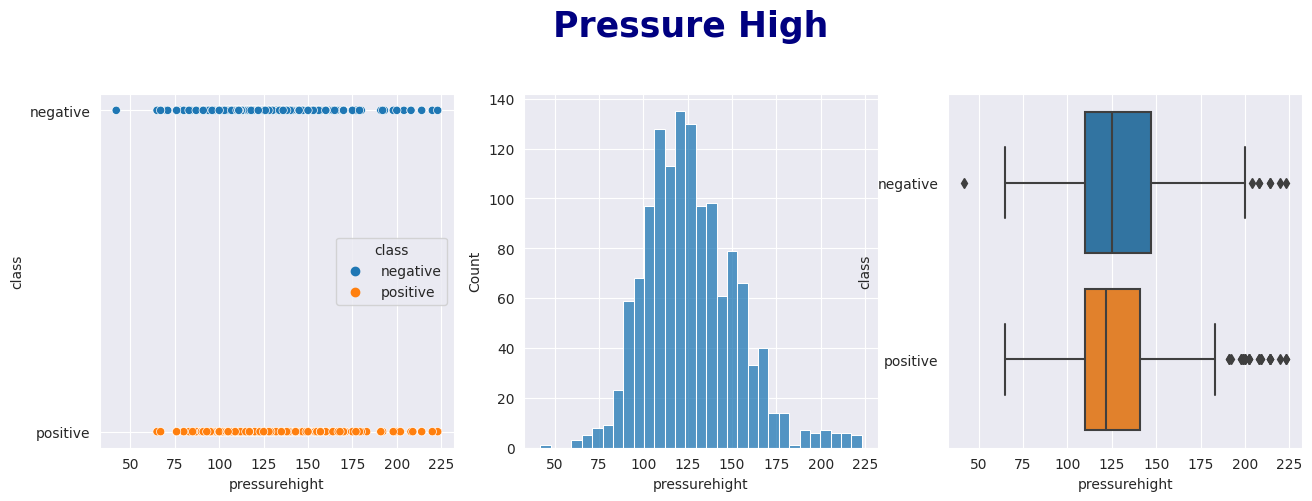

In [195]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Pressure High', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='pressurehight', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='pressurehight', ax=axes[1])

# ax3
sns.boxplot(data=df, x='pressurehight', y='class', ax=axes[2])

plt.show()

### 5. Pressure Low

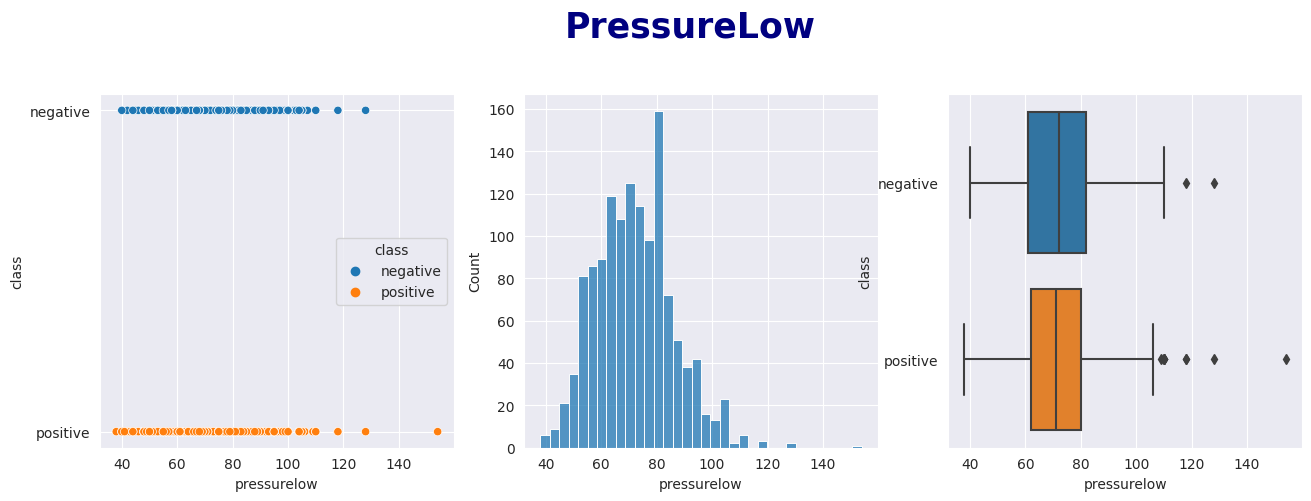

In [196]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('PressureLow', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='pressurelow', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='pressurelow', ax=axes[1])

# ax3
sns.boxplot(data=df, x='pressurelow', y='class')
plt.show()

### 6. Glucose

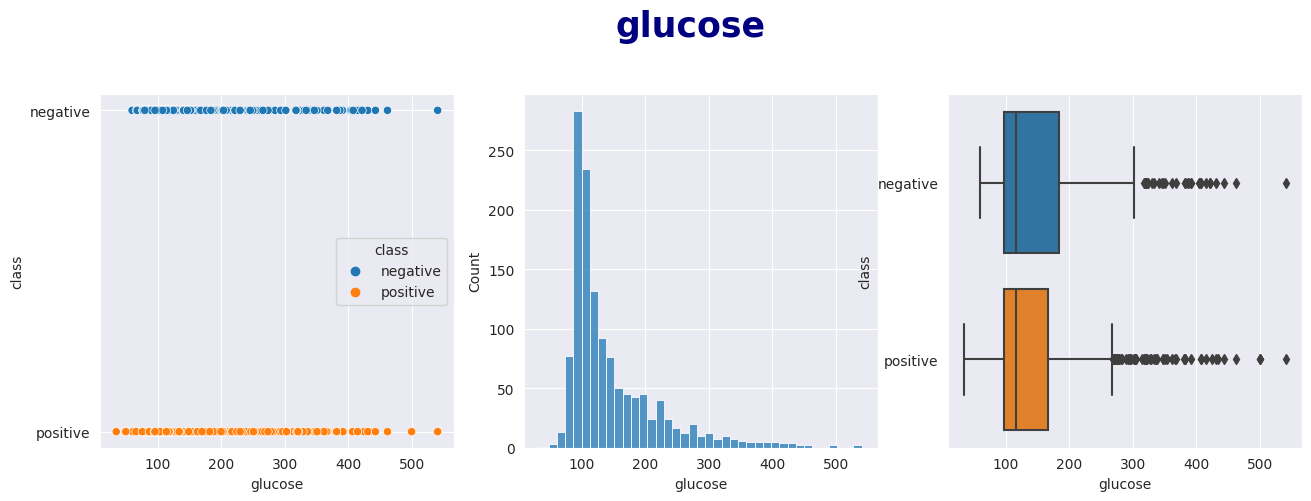

In [197]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('glucose', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='glucose', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='glucose', ax=axes[1])

# ax3
sns.boxplot(data=df, x='glucose', y='class')
plt.show()

### 7. CK-MB

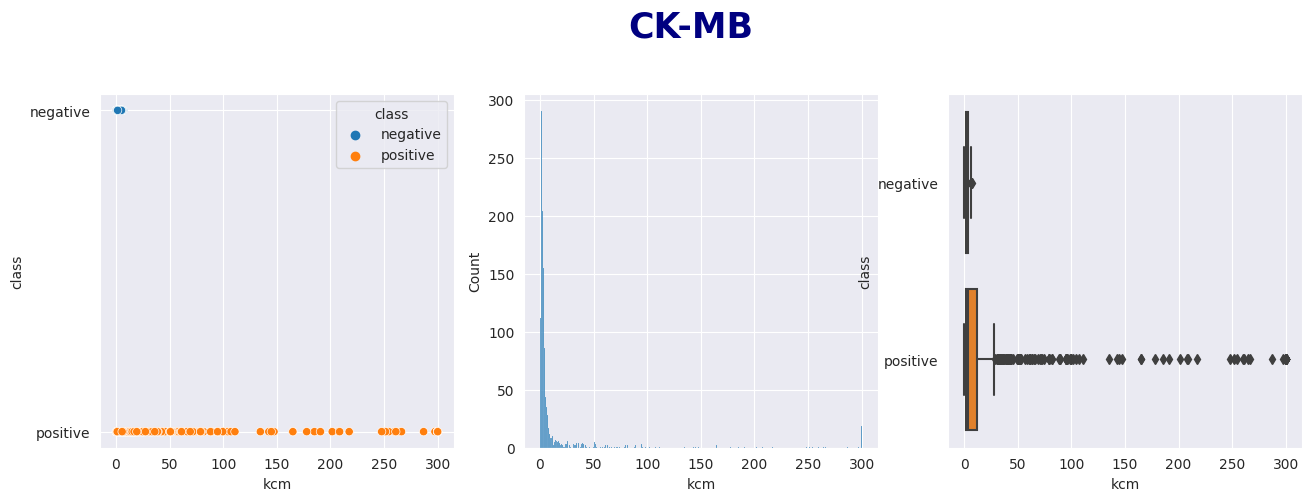

In [198]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('CK-MB', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=df, x='kcm', y='class')
plt.show()

### 8. Troponin

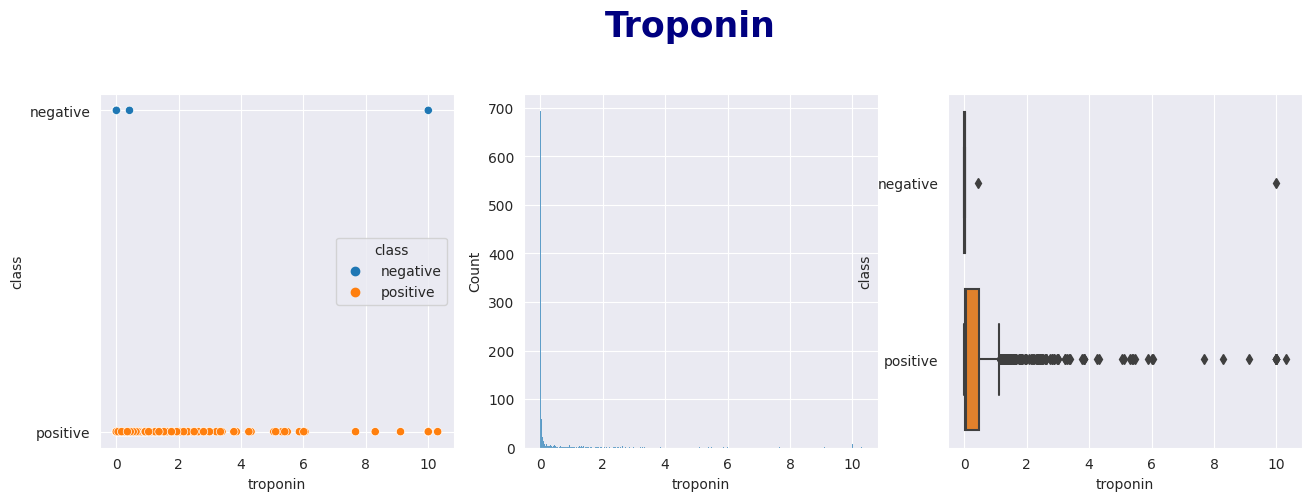

In [199]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=df, x='troponin', y='class')
plt.show()

*Clean the `CK-MB` and `Troponin` data from outliers to plot them again*

In [200]:
z_scores = stats.zscore(df[['troponin', 'kcm']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

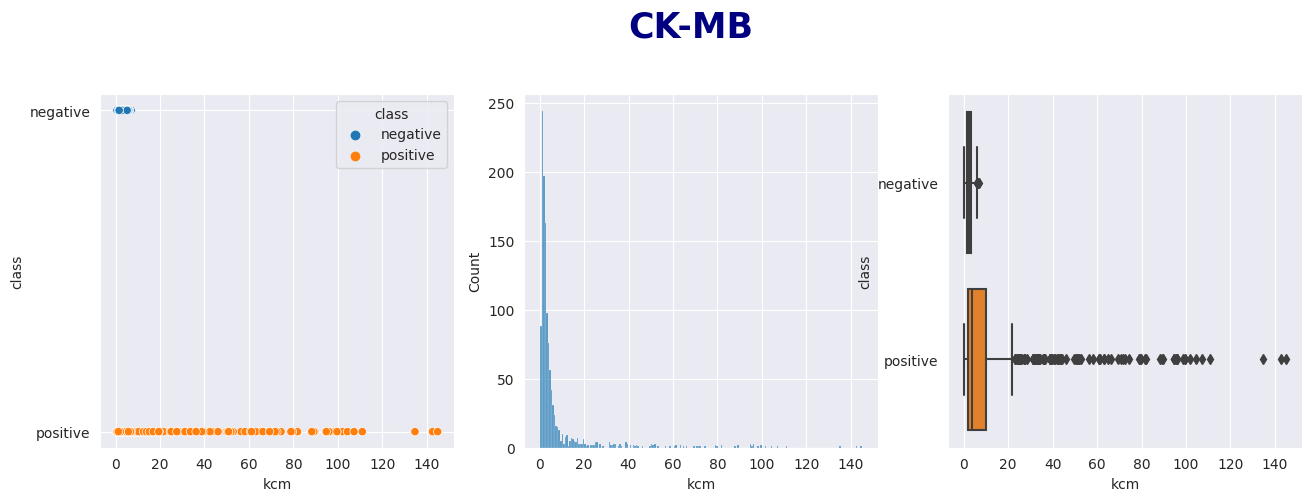

In [201]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('CK-MB', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=df, x='kcm', y='class')
plt.show()

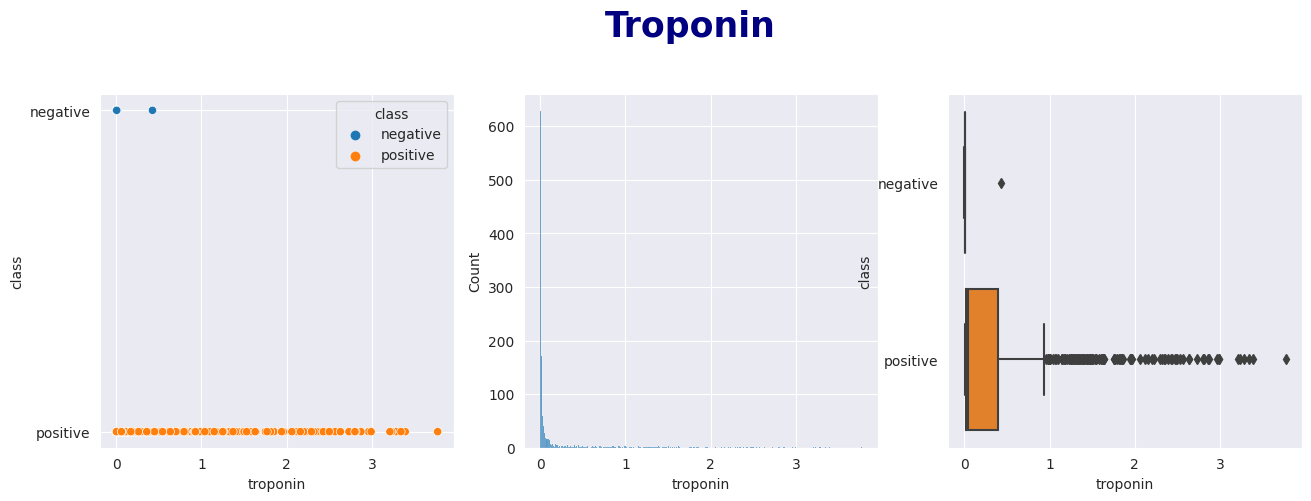

In [202]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=df, x='troponin', y='class')
plt.show()

### Correlation Matrix

- but first we need to convert the class column to numerical values

In [203]:
# Converting class column to numerical data
df['class'] = df['class'].replace({'positive': 1, 'negative': 0})

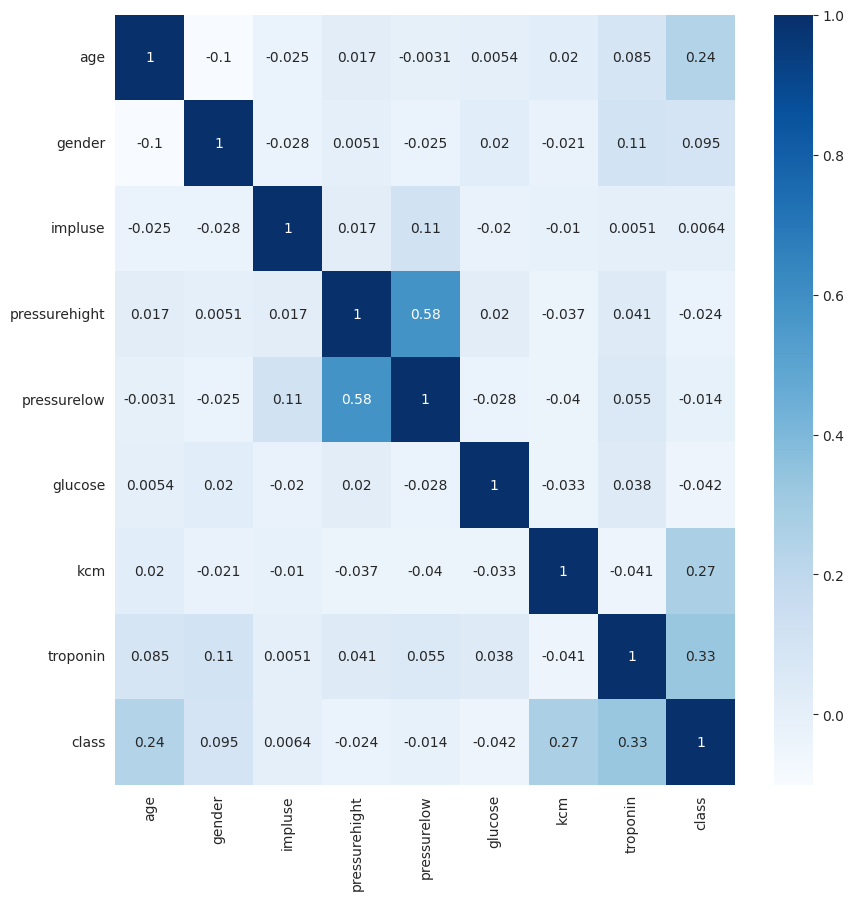

In [204]:
# Create and plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

## Conclusion

1. `Age`, the dataset spans ages from children to elderly people, and it can be noticed that people with heart diseases are on overage older than those without heart diseases.
2. `Gender`, the dataset consists mostly of males (66%), and males are more likely to suffer from heart diseases than females.
3. `Impulse`, the dataset consists mostly of people with normal impulse, and there doesn't seem to be any correlation between impulse and heart diseases.
4. `Pressure High` and `Pressure Low`, the data is normally distributed, and there doesn't seem to be an obvious correlation between pressure and heart diseases.
5. `Glucose`, the data is right skewed, and there's no high correlation between glucose and heart diseases.
6. `CK-MB` and `Troponin`, the data is right skewed, and there's an obvious correlation between both of them and heart diseases.

- We will need to deal with the outliers in the `CK-MB` and `Troponin` columns
- We will also apply log transformation to the `Glucose`, `CK-MB` and `Troponin` columns to make them more normally distributed

# Data Pre processing

In [205]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Define the path to your dataset directory
df = pd.read_csv('/content/drive/MyDrive/DMDW Group 31/Heart Attack.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [206]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [208]:
df[df.impluse > 1000]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


In [209]:
condition = df.impluse < 1000
df = df[condition]

In [210]:
df['class'] = df['class'].replace({'positive': 1, 'negative': 0})
df.rename(columns={'class': 'y'}, inplace=True)
df.head()

<ipython-input-210-770fe0ddde32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].replace({'positive': 1, 'negative': 0})
<ipython-input-210-770fe0ddde32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'class': 'y'}, inplace=True)


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,y
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [211]:
df = pd.get_dummies(df, columns=['gender'])
df.rename(columns={'gender_0': 'female', 'gender_1': 'male'}, inplace=True)

df.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,y,female,male
0,64,66,160,83,160.0,1.80,0.012,0,0,1
1,21,94,98,46,296.0,6.75,1.060,1,0,1
2,55,64,160,77,270.0,1.99,0.003,0,0,1
3,64,70,120,55,270.0,13.87,0.122,1,0,1
4,55,64,112,65,300.0,1.08,0.003,0,0,1


In [212]:
df.shape


(1316, 10)

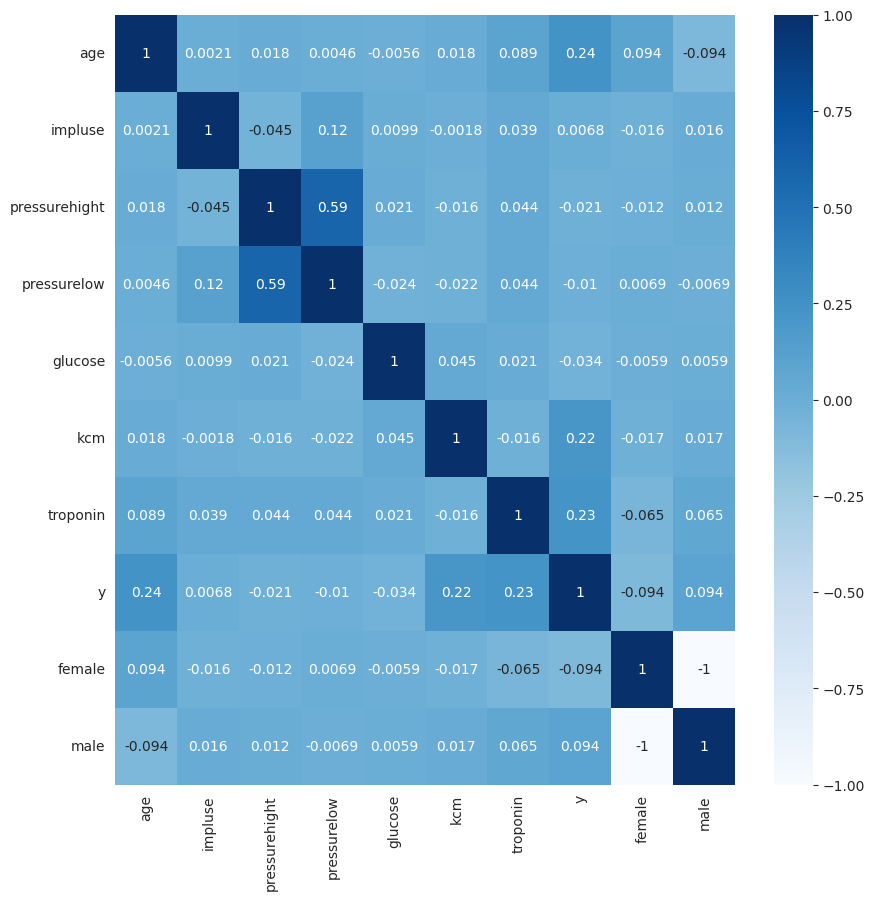

In [213]:
# Create and plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [214]:
X = df.drop('y', axis=1)
y = df['y']

In [215]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [216]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1052, 9), (264, 9), (1052,), (264,))

# Building the Model

## Desicion Tree

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       1.00      0.98      0.99       159

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264

Testing Accuracy for Desicion Tree: 0.9886363636363636
Testing Sensitivity for Desicion Tree: 0.9722222222222222
Testing Specificity for Desicion Tree: 1.0
Testing Precision for Desicion Tree: 1.0


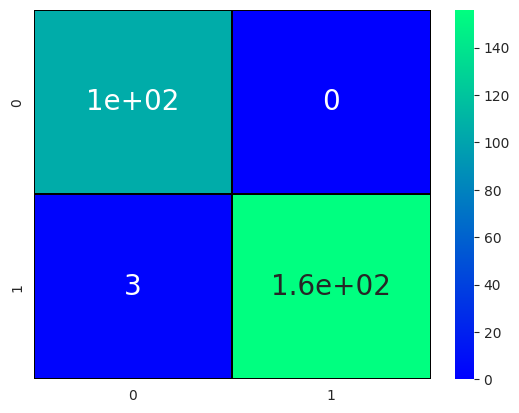

In [217]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create and fit your Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m = tree_model.fit(X, y)

# Make predictions on the test data
prediction = m.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})
print(classification_report(y_test, prediction))

# Calculate evaluation metrics
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TP+TN)/(TP+TN+FN+FP)
sensitivity = (TP/(TP+FN))
specificity = (TN/(TN+FP))
precision = (TP/(TP+FP))

Desicion_Tree = {
    'Model': 'Desicion Tree',
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Precision': precision
}

print('Testing Accuracy for Desicion Tree:',accuracy)
print('Testing Sensitivity for Desicion Tree:',sensitivity)
print('Testing Specificity for Desicion Tree:',specificity)
print('Testing Precision for Desicion Tree:',precision)


## Logistic Regression

Testing Accuracy for Logistic Regression: 0.7878787878787878
Testing Sensitivity for Logistic Regression: 0.6737588652482269
Testing Specificity for Logistic Regression: 0.9186991869918699
Testing Precision for Logistic Regression: 0.9047619047619048


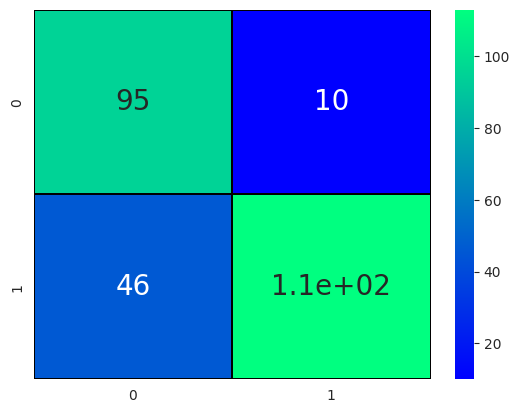

In [218]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

accuracy = (TP+TN)/(TP+TN+FN+FP)
sensitivity = (TP/(TP+FN))
specificity = (TN/(TN+FP))
precision = (TP/(TP+FP))

Logistic_Regression = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Precision': precision
}

print('Testing Accuracy for Logistic Regression:',accuracy)
print('Testing Sensitivity for Logistic Regression:',sensitivity)
print('Testing Specificity for Logistic Regression:',specificity)
print('Testing Precision for Logistic Regression:',precision)

## Random Forest Classifier

Testing Accuracy for Random Forest: 0.9734848484848485
Testing Sensitivity for Random Forest: 0.9537037037037037
Testing Specificity for Random Forest: 0.9871794871794872
Testing Precision for Random Forest: 0.9809523809523809


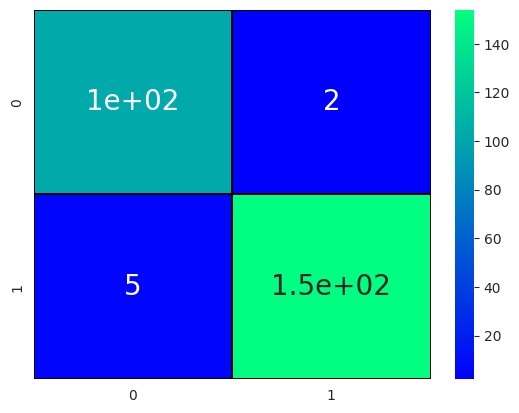

In [219]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(x_train, y_train)
prediction3 = model3.predict(x_test)

cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

accuracy = (TP+TN)/(TP+TN+FN+FP)
sensitivity = (TP/(TP+FN))
specificity = (TN/(TN+FP))
precision = (TP/(TP+FP))

Random_Forest = {
    'Model': 'Random Forest',
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Precision': precision
}

print('Testing Accuracy for Random Forest:',accuracy)
print('Testing Sensitivity for Random Forest:',sensitivity)
print('Testing Specificity for Random Forest:',specificity)
print('Testing Precision for Random Forest:',precision)

## Support Vector Machines(SVM)

Testing Accuracy for SVM: 0.875
Testing Sensitivity for SVM: 0.7950819672131147
Testing Specificity for SVM: 0.9436619718309859
Testing Precision for SVM: 0.9238095238095239


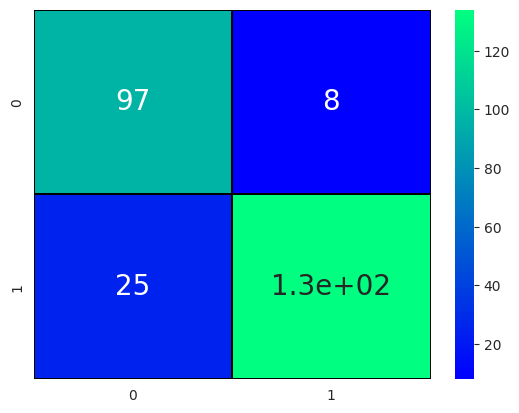

In [220]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


svm=SVC(C=12,kernel='linear')
model=svm.fit(x_train,y_train)
prediction4=model.predict(x_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

accuracy = (TP+TN)/(TP+TN+FN+FP)
sensitivity = (TP/(TP+FN))
specificity = (TN/(TN+FP))
precision = (TP/(TP+FP))

Support_Vector_Machines = {
    'Model': 'Support Vector Machines',
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Precision': precision
}

print('Testing Accuracy for SVM:',accuracy)
print('Testing Sensitivity for SVM:',sensitivity)
print('Testing Specificity for SVM:',specificity)
print('Testing Precision for SVM:',precision)

## model comparison

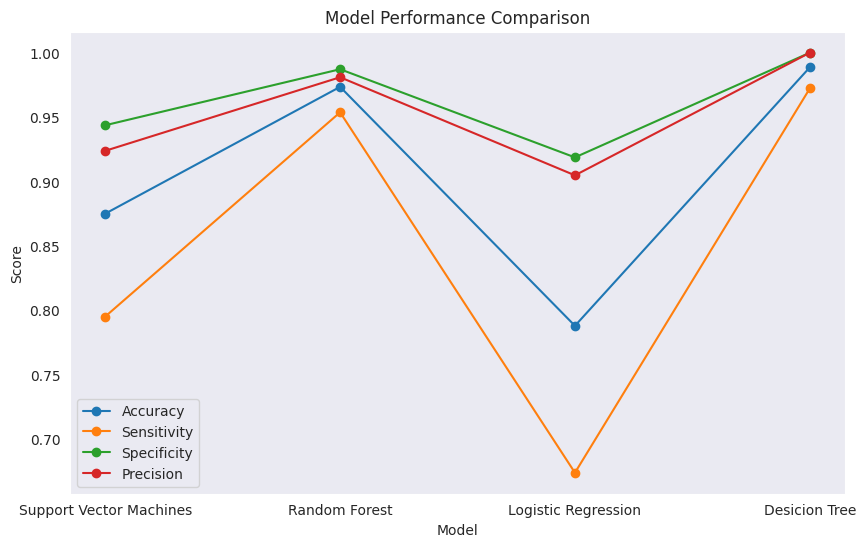

In [221]:
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrames for models
df = pd.DataFrame([Support_Vector_Machines, Random_Forest, Logistic_Regression, Desicion_Tree])

# Create a multi-mode graph
plt.figure(figsize=(10, 6))

# You can customize the appearance of the graph as needed
plt.plot(df['Model'], df['Accuracy'], marker='o', label='Accuracy')
plt.plot(df['Model'], df['Sensitivity'], marker='o', label='Sensitivity')
plt.plot(df['Model'], df['Specificity'], marker='o', label='Specificity')
plt.plot(df['Model'], df['Precision'], marker='o', label='Precision')

# Add labels and legends
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()

# Show the graph
plt.grid()
plt.show()


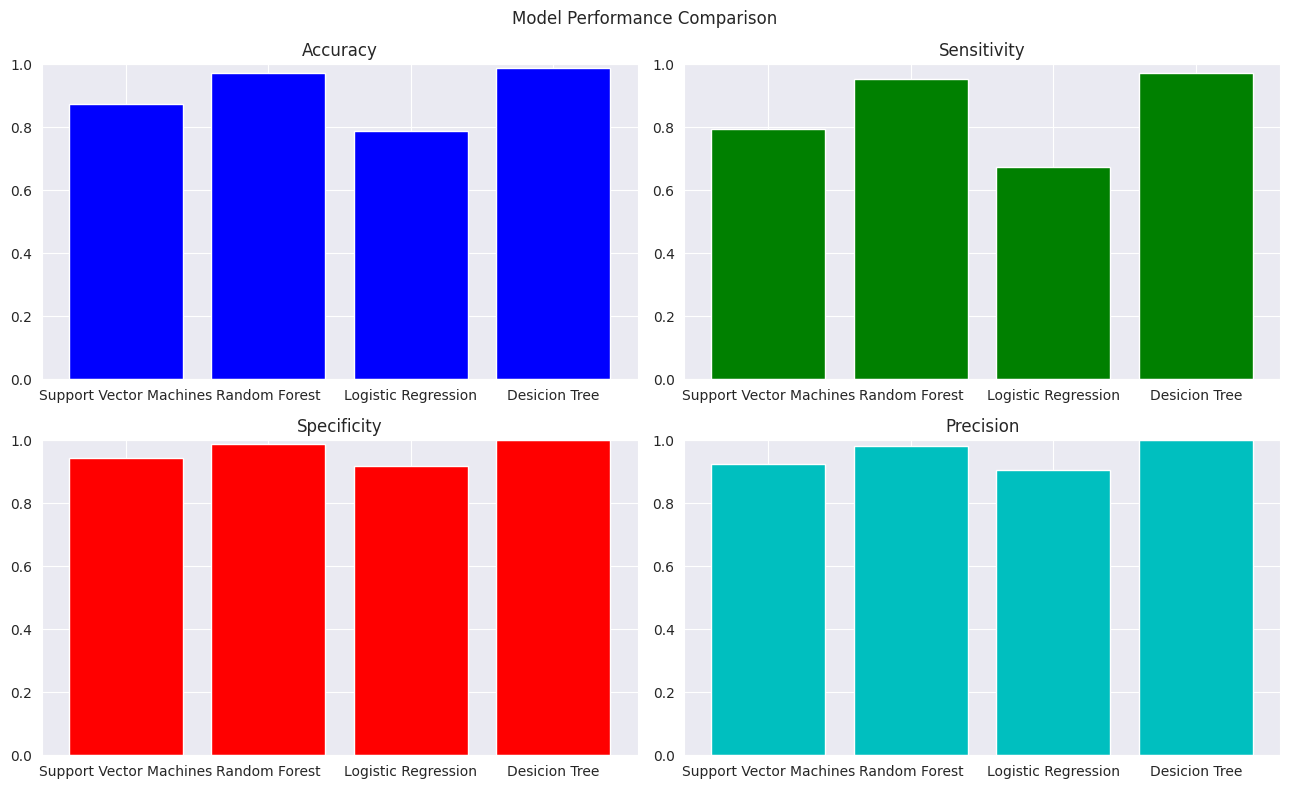

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrames for all models
df = pd.DataFrame([Support_Vector_Machines, Random_Forest, Logistic_Regression, Desicion_Tree])

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle('Model Performance Comparison')

# Create bar charts for each attribute in separate subplots
attributes = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision']
colors = ['b', 'g', 'r', 'c']  # Color for each attribute

for i, ax in enumerate(axs.flat):
    ax.bar(df['Model'], df[attributes[i]], color=colors[i])
    ax.set_title(attributes[i])
    ax.set_ylim(0, 1)  # Set y-axis limits to match metric range (0-1)

# Show the graph
plt.tight_layout()
plt.show()


## using the model

In [223]:
# Get user input for the variables
age = int(input("Enter age: "))
impulse = int(input("Enter impulse: "))
pressurehigh = int(input("Enter high blood pressure: "))
pressurelow = int(input("Enter low blood pressure: "))
glucose = float(input("Enter glucose level: "))
kcm = float(input("Enter kcm: "))
troponin = float(input("Enter troponin level: "))

# Get gender from radio input
gender_input = input("Enter gender (female or male): ")
if gender_input.lower() == "female":
    female = 1
    male = 0
elif gender_input.lower() == "male":
    female = 0
    male = 1
else:
    print("Invalid gender input. Please enter 'female' or 'male'.")
    exit()

# Create a NumPy array with the collected data
# new_data = np.array([[ 55,	64,	112,	65,	300.0,	1.08,	0.003, 0,	1]])
new_data = np.array([[age, impulse, pressurehigh, pressurelow, glucose, kcm, troponin, female, male]])

# Use the trained model to make predictions on the new data
predicted_class = tree_model.predict(new_data)

# Interpret the prediction
if predicted_class == 1:
    print("The patient seems to have heart disease.")
else:
    print("The patient seems to be normal.")


Enter age: 55
Enter impulse: 64
Enter high blood pressure: 112
Enter low blood pressure: 65
Enter glucose level: 300
Enter kcm: 1.08
Enter troponin level: 0.003
Enter gender (female or male): male
The patient seems to have heart disease.
